<a href="https://colab.research.google.com/github/ShibinMohammed/Data-science-projects/blob/main/IoT_Devices_Testing_Efficacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IoT Devices - Testing Efficacy


### Context

The **Internet of things (IoT)** describes the network of physical objects that are embedded with sensors, software, and other technologies to connect and exchange data with other devices and systems over the **Internet**.

IoT devices have been around for quite a while now. They are used to collect data through different kinds of sensors such as **motion sensors**, **heat sensors**, **vibration sensors**, etc.

A lot of people are using smartwatches and fitness watches to track their daily physical activities, calories burnt, average resting heart rates, and sleep cycle so that they lead a fit life. Such wearables are equipped with laser sensors to collect data.

Heat Index (temperature + humidity) is one common data recorded on these IoT readers. The sensor reads hundreds to millions of data per second. There is a huge and versatile application of this data in real-world like agriculture, weather forecasting, soil monitoring and treatment, enterprise maintenance, and so on.

Heat stress index of India:

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/heat_index_india.png' width=600>


### Problem Statement

As a quality analyst whose task is to test the efficacy of new IoT devices,create time-series plots for daily temperature variation for the given duration and find any inconsistencies in the temperature readings (if there are any).

In case the data collected through the device is correct, find the percentages of the yellow, orange, and red zones.

In [ ]:
# Import the required modules and load the dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# Dataset link = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/iot-devices/IoT-device.csv'
df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/iot-devices/IoT-device.csv')
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [ ]:
# Get the information of DataFrame using the 'info()' function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


---

In [ ]:
# The null values in DataFrame are checked using the 'isnull()' function.
df.isna().sum()

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

In [ ]:
# The values contained in the 'noted_date' column are coverted into the 'datetime' objects.
dt_noted_date = pd.to_datetime(df['noted_date'])
df['noted_date'] = dt_noted_date

In [ ]:
# Verify whether the conversion is successful or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          97606 non-null  object        
 1   room_id/id  97606 non-null  object        
 2   noted_date  97606 non-null  datetime64[ns]
 3   temp        97606 non-null  int64         
 4   out/in      97606 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.7+ MB


In [ ]:
# Sort the DataFrame in the increasing order of dates and time.
df.sort_values('noted_date')

,id,room_id/id,noted_date,temp,out/in
16218,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In
16217,__export__.temp_log_146101_e61c18d4,Room Admin,2018-01-11 00:07:00,40,Out
16216,__export__.temp_log_111262_7b3ed086,Room Admin,2018-01-11 00:09:00,39,Out
16215,__export__.temp_log_147650_344507e9,Room Admin,2018-01-11 00:13:00,40,Out
16214,__export__.temp_log_139505_cd77d7f9,Room Admin,2018-01-11 00:23:00,40,Out
...,...,...,...,...,...
50668,__export__.temp_log_41241_36e995ef,Room Admin,2018-12-10 23:41:00,44,Out
50667,__export__.temp_log_41244_1cef6363,Room Admin,2018-12-10 23:43:00,44,Out
50666,__export__.temp_log_41249_7d6819cd,Room Admin,2018-12-10 23:49:00,44,Out
50665,__export__.temp_log_41250_eed95540,Room Admin,2018-12-10 23:51:00,45,Out


In [ ]:
# Create new columns for year, month, day, day name, hours and minutes values and add to the DataFrame.
df['Year'] = df['noted_date'].dt.year
df['Month'] = df['noted_date'].dt.month
df['Day'] = df['noted_date'].dt.day
df['Day_name'] = df['noted_date'].dt.day_name()
df['Hours'] = df['noted_date'].dt.hour
df['Minutes'] = df['noted_date'].dt.minute

In [ ]:
# Display the first five rows of the DataFrame.
df.head()

,id,room_id/id,noted_date,temp,out/in,Year,Month,Day,Day_name,Hours,Minutes
0,__export__.temp_log_196134_bd201015,Room Admin,2018-08-12 09:30:00,29,In,2018,8,12,Sunday,9,30
1,__export__.temp_log_196131_7bca51bc,Room Admin,2018-08-12 09:30:00,29,In,2018,8,12,Sunday,9,30
2,__export__.temp_log_196127_522915e3,Room Admin,2018-08-12 09:29:00,41,Out,2018,8,12,Sunday,9,29
3,__export__.temp_log_196128_be0919cf,Room Admin,2018-08-12 09:29:00,41,Out,2018,8,12,Sunday,9,29
4,__export__.temp_log_196126_d30b72fb,Room Admin,2018-08-12 09:29:00,31,In,2018,8,12,Sunday,9,29


In [ ]:
# Create a DataFrame for the indoor temperature records using 'df[df['out/in'] == 'In']'.
in_temp_df = df[df['out/in'] == 'In']

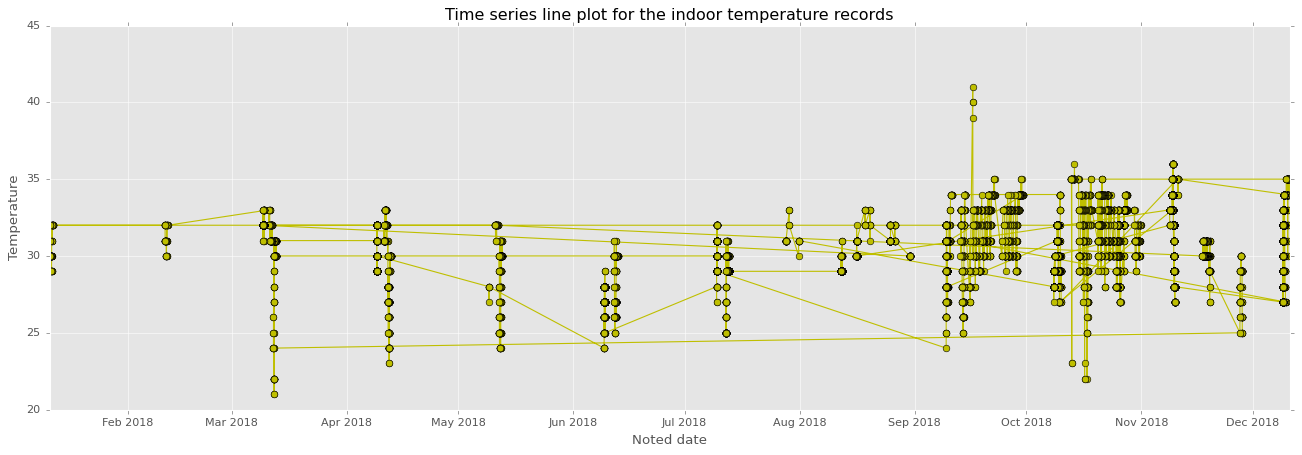

In [ ]:
# Create a time series line plot for the indoor temperature records.
plt.style.use('ggplot')
plt.figure(figsize=(20,6))
plt.title('Time series line plot for the indoor temperature records')
# pass the 'noted_date' and 'temp' columns of the indoor temperature Dataframe inside the 'plot()' function.
plt.plot(in_temp_df['noted_date'],in_temp_df['temp'],'y-o')
plt.xlabel('Noted date')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

In [ ]:
# Create a DataFrame for the outdoor temperature records.
out_temp_df = df[df['out/in']=='Out']

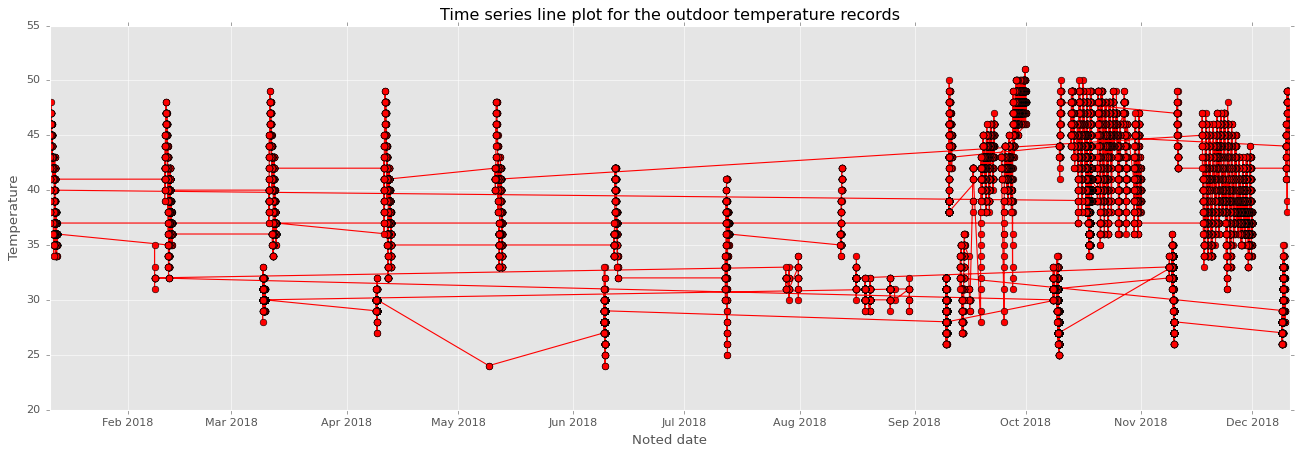

In [ ]:
# Create a time series line plot for the outdoor temperature records.
plt.style.use('ggplot')
plt.figure(figsize=(20,6))
plt.title('Time series line plot for the outdoor temperature records')
plt.plot(out_temp_df['noted_date'],out_temp_df['temp'],'r-o')
plt.xlabel('Noted date')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

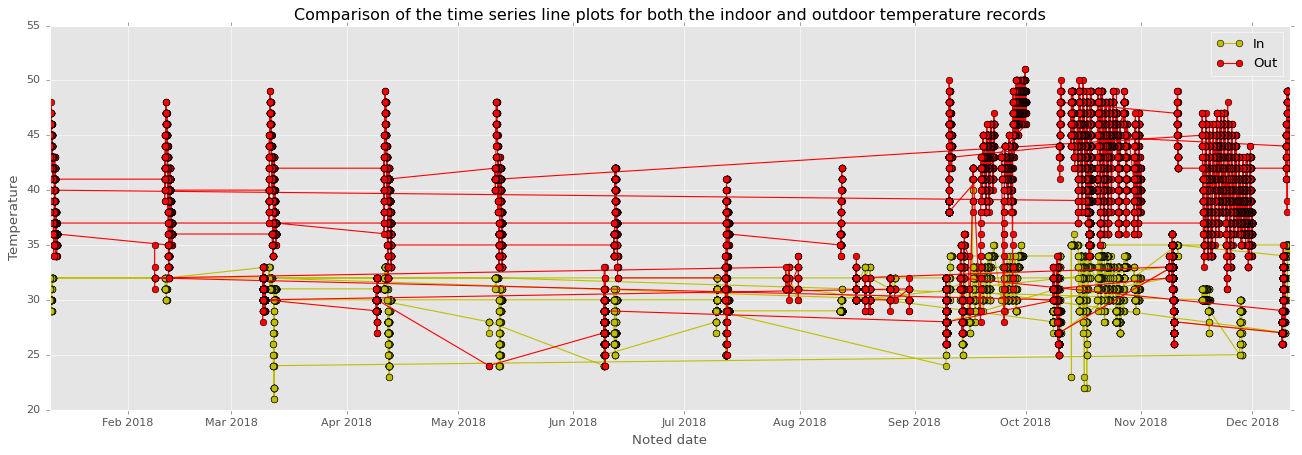

In [ ]:
# Compare the time series line plots for both the indoor and outdoor temperature records.
plt.style.use('ggplot')
plt.figure(figsize=(20,6))
plt.title('Comparison of the time series line plots for both the indoor and outdoor temperature records')
plt.plot(in_temp_df['noted_date'],in_temp_df['temp'],'y-o',label = 'In')
plt.plot(out_temp_df['noted_date'],out_temp_df['temp'],'r-o',label = 'Out')
plt.xlabel('Noted date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

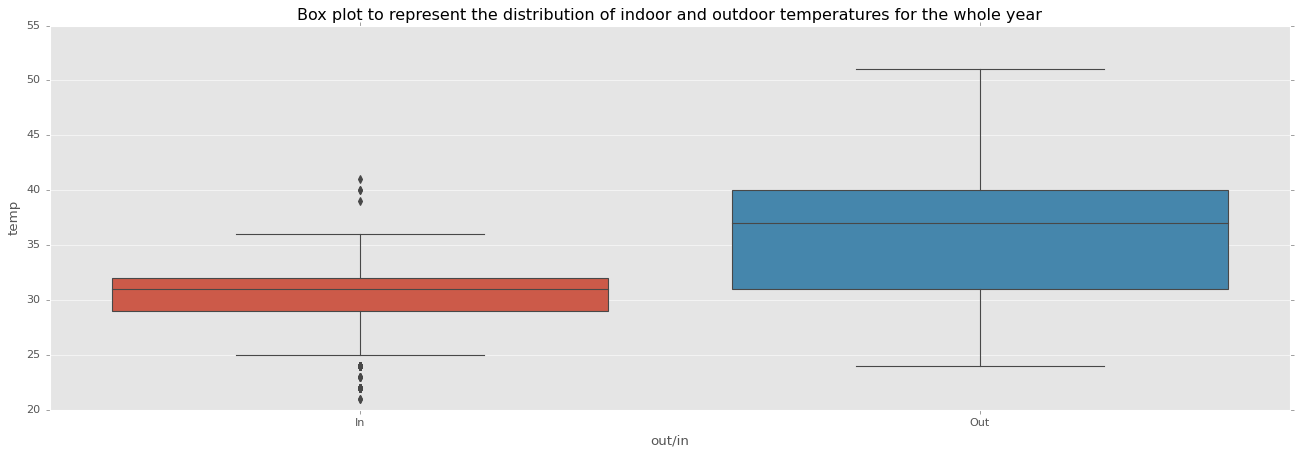

In [ ]:
# Create a box plot to represent the distribution of indoor and outdoor temperatures for the whole year.
plt.style.use('ggplot')
plt.figure(figsize=(20,6))
plt.title('Box plot to represent the distribution of indoor and outdoor temperatures for the whole year')
# pass the 'out/in' and 'temp' columns inside the 'x' and 'y' attributes of the 'boxplot()' function.
sns.boxplot(x='out/in',y='temp',data=df)
plt.show()

In [ ]:
# Get the maximum and minimum temperatures for each day in each month.
df.groupby(by=['Month', 'Day']).agg(func={'temp' : ['max', 'min']})

temp    
           max min
Month Day         
1     11    48  29
      12    43  34
2     8     35  31
      11    48  30
      12    42  32
...        ...  ..
11    28    43  25
      29    43  33
      30    44  34
12    9     35  26
      10    49  30

[86 rows x 2 columns]

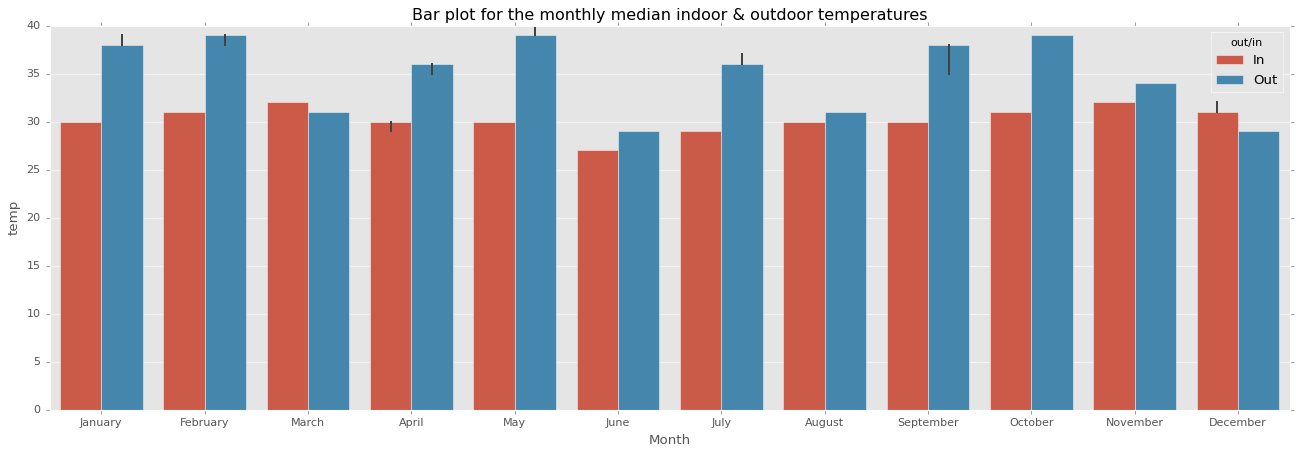

In [ ]:
# Create a bar plot for the monthly median indoor & outdoor temperatures in a single bar chart.
# Store the month names in a list i.e the labels of the x-axis
month_names = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.style.use('ggplot')
plt.figure(figsize=(20,6))
plt.title('Bar plot for the monthly median indoor & outdoor temperatures')
# Import 'median' from the 'numpy' module
from numpy import median
# Pass 'month', 'temp' and 'out/in' columns inside the 'x', 'y' and 'hue' parameters of the 'barplot()' function
# Set the 'estimator' attribute with 'median' value
sns.barplot(x='Month',y='temp',hue='out/in',data=df,estimator = median)
# pass the list holding the name of months inside the 'xticks()' function
# set 'ticks=np.arrange(12)'
plt.xticks(ticks = np.arange(12),labels = month_names)
plt.show()

In [ ]:
# Function to label each temperature value on a given day and time with the heat indices as advised in the data-description.
def heat_index(temp_series):
  heat_index_list = []
  for temp in temp_series:
    if temp <= 32:
      heat_index_list.append('Green')
    elif (temp > 32) and (temp <= 41):
      heat_index_list.append('Yellow')
    elif (temp > 41) and (temp <= 54):
      heat_index_list.append('Orange')
    else:
      heat_index_list.append('Red')
  return pd.Series(data=heat_index_list, index=temp_series.index)

heat_index(df['temp'])

0         Green
1         Green
2        Yellow
3        Yellow
4         Green
          ...  
97601     Green
97602     Green
97603     Green
97604     Green
97605     Green
Length: 97606, dtype: object

In [ ]:
# Add the 'heat_index' column in the DataFrame containing the heat indices corresponding to the temperature values on a given day and time.
df['heat_index'] = heat_index(df['temp'])
df.head()

,id,room_id/id,noted_date,temp,out/in,Year,Month,Day,Day_name,Hours,Minutes,heat_index
0,__export__.temp_log_196134_bd201015,Room Admin,2018-08-12 09:30:00,29,In,2018,8,12,Sunday,9,30,Green
1,__export__.temp_log_196131_7bca51bc,Room Admin,2018-08-12 09:30:00,29,In,2018,8,12,Sunday,9,30,Green
2,__export__.temp_log_196127_522915e3,Room Admin,2018-08-12 09:29:00,41,Out,2018,8,12,Sunday,9,29,Yellow
3,__export__.temp_log_196128_be0919cf,Room Admin,2018-08-12 09:29:00,41,Out,2018,8,12,Sunday,9,29,Yellow
4,__export__.temp_log_196126_d30b72fb,Room Admin,2018-08-12 09:29:00,31,In,2018,8,12,Sunday,9,29,Green


In [ ]:
# Counts of the heat zones.
group_heat_index = df.groupby(by=['heat_index', 'out/in'])
heat_index_agg = group_heat_index.agg(func={'temp' : ['max', 'count']})
heat_index_agg

temp       
                   max  count
heat_index out/in            
Green      In       32  16812
           Out      32  24845
Orange     Out      51  12407
Yellow     In       41   3533
           Out      41  40009

In [ ]:
heat_index_agg.columns

MultiIndex([('temp',   'max'),
            ('temp', 'count')],
           )

In [ ]:
# Percentage distribution of the heat zones.
heat_index_agg[('temp', 'percent')] = heat_index_agg[('temp', 'count')] * 100 / df.shape[0]
heat_index_agg

temp                  
                   max  count    percent
heat_index out/in                       
Green      In       32  16812  17.224351
           Out      32  24845  25.454378
Orange     Out      51  12407  12.711309
Yellow     In       41   3533   3.619655
           Out      41  40009  40.990308